In [138]:
# CODE IDEAS WAS TAKEN FROM THIS AUTHOR
# https://www.kaggle.com/code/prashant111/decision-tree-classifier-tutorial

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization

excel_file=pd.read_excel('/content/Temperature_dataset.xlsx')

In [139]:
'''
View dimensions of dataset.
E.g. total rows and cols.
'''

excel_file.shape

(6676, 5)

In [140]:
'''
Preview dataset.
Shows top 5 cols and rows.
'''

excel_file.head()

,Number,Time of day,Temperature,Date,Status
0,0,0,17,2022-01-04 00:00:00,Good night temp
1,1,1,21,2022-01-04 01:00:00,Bad night temp
2,2,2,18,2022-01-04 02:00:00,Good night temp
3,3,3,14,2022-01-04 03:00:00,Bad night temp
4,4,4,20,2022-01-04 04:00:00,Bad night temp


In [141]:
'''
Shows summary of dataset.
'''

excel_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6676 entries, 0 to 6675
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Number       6676 non-null   int64         
 1   Time of day  6676 non-null   int64         
 2   Temperature  6676 non-null   int64         
 3   Date         6676 non-null   datetime64[ns]
 4   Status       6676 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 260.9+ KB


In [142]:
'''
Shows each class in status col
'''

excel_file['Status'].value_counts()

,count
Status,
Good morning temp,868
Bad evening temp,849
Good day temp,841
Good night temp,837
Bad day temp,833
Bad night temp,823
Good evening temp,814
Bad morning temp,811


In [143]:
'''
Make X and Y, X is features that can help predict outcome
and Y is target variable. Then splits dataset into train and test
sets. Split is 80/20, 80 of train and 20 of test set.
'''

from sklearn.model_selection import train_test_split

X = excel_file[['Time of day','Temperature']]

y = excel_file['Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

X_train.shape, X_test.shape

((5340, 2), (1336, 2))

In [144]:
'''
Uses decision tree classifier to train model with criterion gini.
And limits depth of tree up to 5 nodes. Note that here we can make it smaller,
but in case of ,y dataset, to reach ideal score 5 nodes is okay.
'''

from sklearn.tree import DecisionTreeClassifier

model_gini = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=0)

model_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=0)

In [145]:
'''
Now this uses trained model to test on test set. And prints how well model trained and
how well it doing with unseen data.
'''

from sklearn.metrics import accuracy_score

y_pred_gini = model_gini.predict(X_test)
y_pred_train_gini = model_gini.predict(X_train)

print('Training set score: {:.4f}'.format(model_gini.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(model_gini.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 1.0000


[Text(0.6527777777777778, 0.9166666666666666, 'x[0] <= 17.5\ngini = 0.875\nsamples = 5340\nvalue = [675, 693, 652, 656, 637, 656, 714, 657]'),
 Text(0.4166666666666667, 0.75, 'x[0] <= 11.5\ngini = 0.833\nsamples = 3991\nvalue = [675, 0, 652, 656, 637, 0, 714, 657]'),
 Text(0.5347222222222222, 0.8333333333333333, 'True  '),
 Text(0.2222222222222222, 0.5833333333333334, 'x[0] <= 5.5\ngini = 0.75\nsamples = 2679\nvalue = [0, 0, 652, 656, 0, 0, 714, 657]'),
 Text(0.1111111111111111, 0.4166666666666667, 'x[1] <= 15.5\ngini = 0.5\nsamples = 1313\nvalue = [0, 0, 0, 656, 0, 0, 0, 657]'),
 Text(0.05555555555555555, 0.25, 'gini = 0.0\nsamples = 331\nvalue = [0, 0, 0, 331, 0, 0, 0, 0]'),
 Text(0.16666666666666666, 0.25, 'x[1] <= 19.5\ngini = 0.443\nsamples = 982\nvalue = [0, 0, 0, 325, 0, 0, 0, 657]'),
 Text(0.1111111111111111, 0.08333333333333333, 'gini = 0.0\nsamples = 657\nvalue = [0, 0, 0, 0, 0, 0, 0, 657]'),
 Text(0.2222222222222222, 0.08333333333333333, 'gini = 0.0\nsamples = 325\nvalue = [

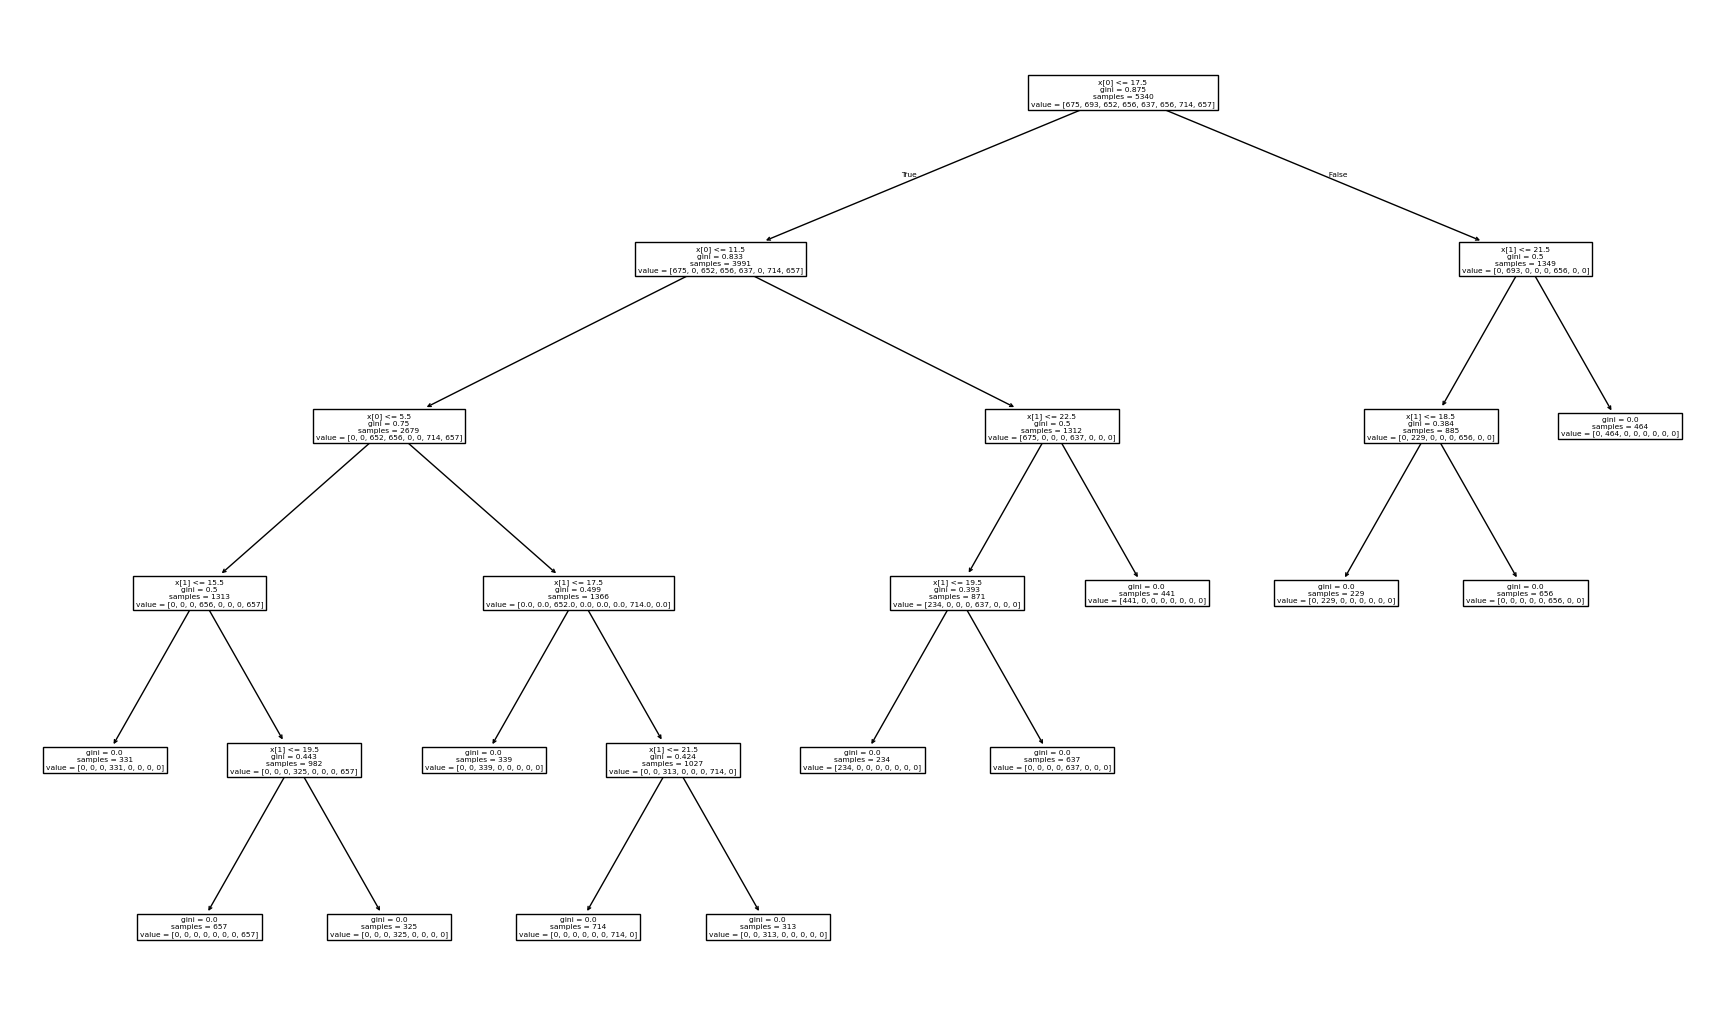

In [146]:
'''
In this case, a decision tree is created. The first parameter is selected, x[0],
which is the time of day, and is taken if the time of day <=17.5, if true, then
we reduce the time further, if not true, then you can immediately go along the
right branch and use the second parameter, which is temperature. The model strives
to reduce gini to zero, and then you can see that in values ​​there will be only one
value, model basicly sais that: "all such examples belong to this class".
'''

from sklearn import tree

plt.figure(figsize=(22,13))

tree.plot_tree(model_gini.fit(X_train, y_train))

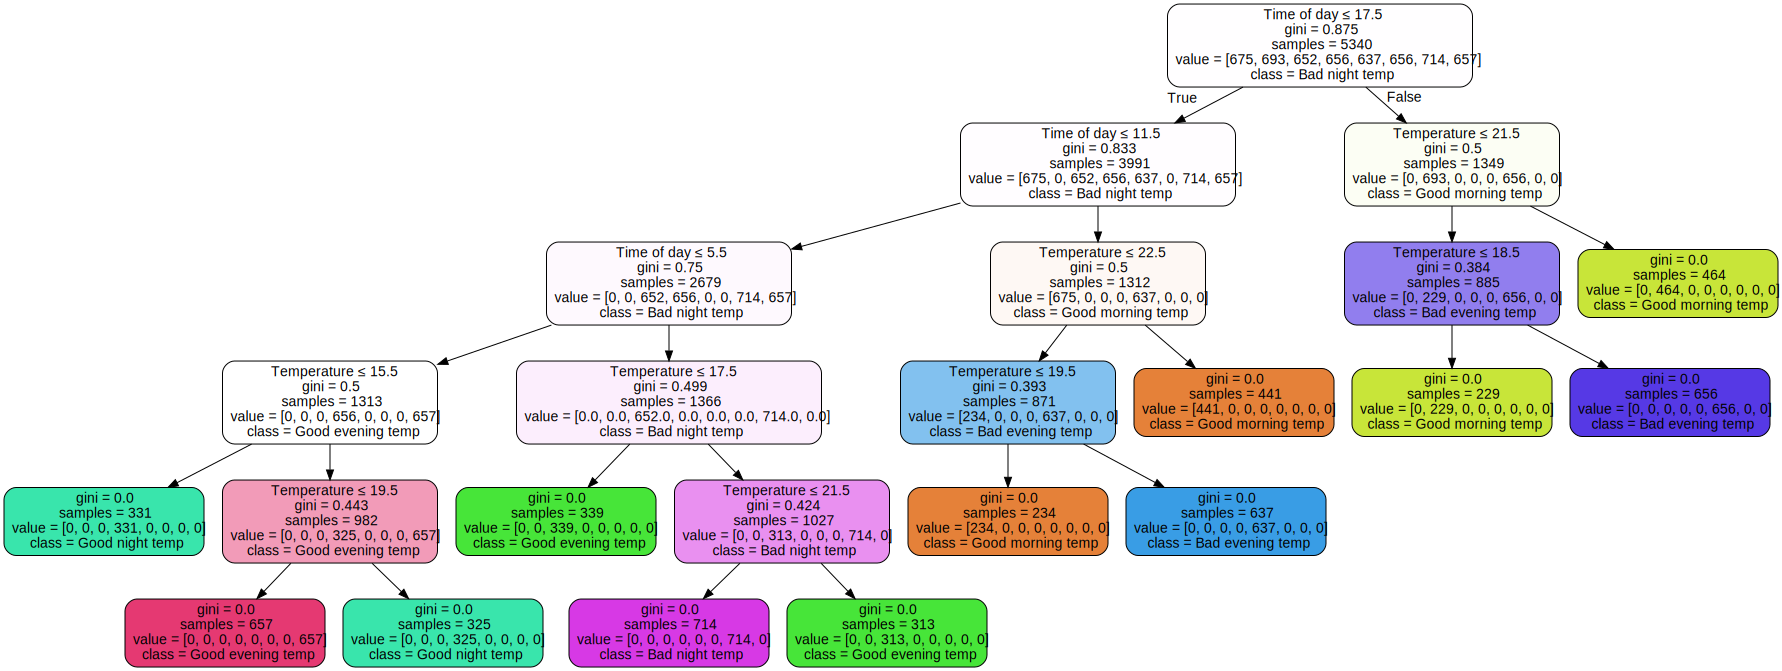

In [147]:
'''
Here is the same thing as previous but better with samples and different colors.
'''

import graphviz
dot_data = tree.export_graphviz(model_gini, out_file=None,
                              feature_names=X_train.columns,
                              class_names=y_train,
                              filled=True, rounded=True,
                              special_characters=True)

graph = graphviz.Source(dot_data)

graph

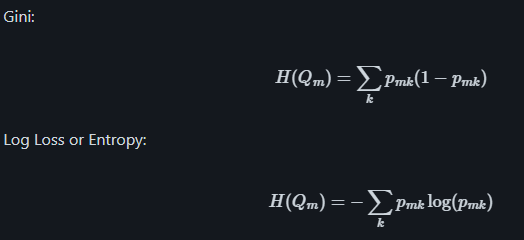

In [148]:
'''
Here we use entropy criteria, to train model. Here we use only 4 depth to reach
maximal testing results. Basicly the key difference between entropy and gini is that
entropy uses logarithms, while gini not. In results, gini supposed to be a bit faster.
Also there exist log_loss criterion, but it uses same math function as entropy.
'''

model_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0)


# fit the model
model_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0)

In [149]:
y_pred_en = model_entropy.predict(X_test)
y_pred_train_en = model_entropy.predict(X_train)

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

Model accuracy score with criterion entropy: 1.0000
Training-set accuracy score: 1.0000


[Text(0.5, 0.9, 'x[0] <= 11.5\nentropy = 2.999\nsamples = 5340\nvalue = [675, 693, 652, 656, 637, 656, 714, 657]'),
 Text(0.2222222222222222, 0.7, 'x[0] <= 5.5\nentropy = 1.999\nsamples = 2679\nvalue = [0, 0, 652, 656, 0, 0, 714, 657]'),
 Text(0.3611111111111111, 0.8, 'True  '),
 Text(0.1111111111111111, 0.5, 'x[1] <= 15.5\nentropy = 1.0\nsamples = 1313\nvalue = [0, 0, 0, 656, 0, 0, 0, 657]'),
 Text(0.05555555555555555, 0.3, 'entropy = 0.0\nsamples = 331\nvalue = [0, 0, 0, 331, 0, 0, 0, 0]'),
 Text(0.16666666666666666, 0.3, 'x[1] <= 19.5\nentropy = 0.916\nsamples = 982\nvalue = [0, 0, 0, 325, 0, 0, 0, 657]'),
 Text(0.1111111111111111, 0.1, 'entropy = 0.0\nsamples = 657\nvalue = [0, 0, 0, 0, 0, 0, 0, 657]'),
 Text(0.2222222222222222, 0.1, 'entropy = 0.0\nsamples = 325\nvalue = [0, 0, 0, 325, 0, 0, 0, 0]'),
 Text(0.3333333333333333, 0.5, 'x[1] <= 17.5\nentropy = 0.999\nsamples = 1366\nvalue = [0.0, 0.0, 652.0, 0.0, 0.0, 0.0, 714.0, 0.0]'),
 Text(0.2777777777777778, 0.3, 'entropy = 0.0\ns

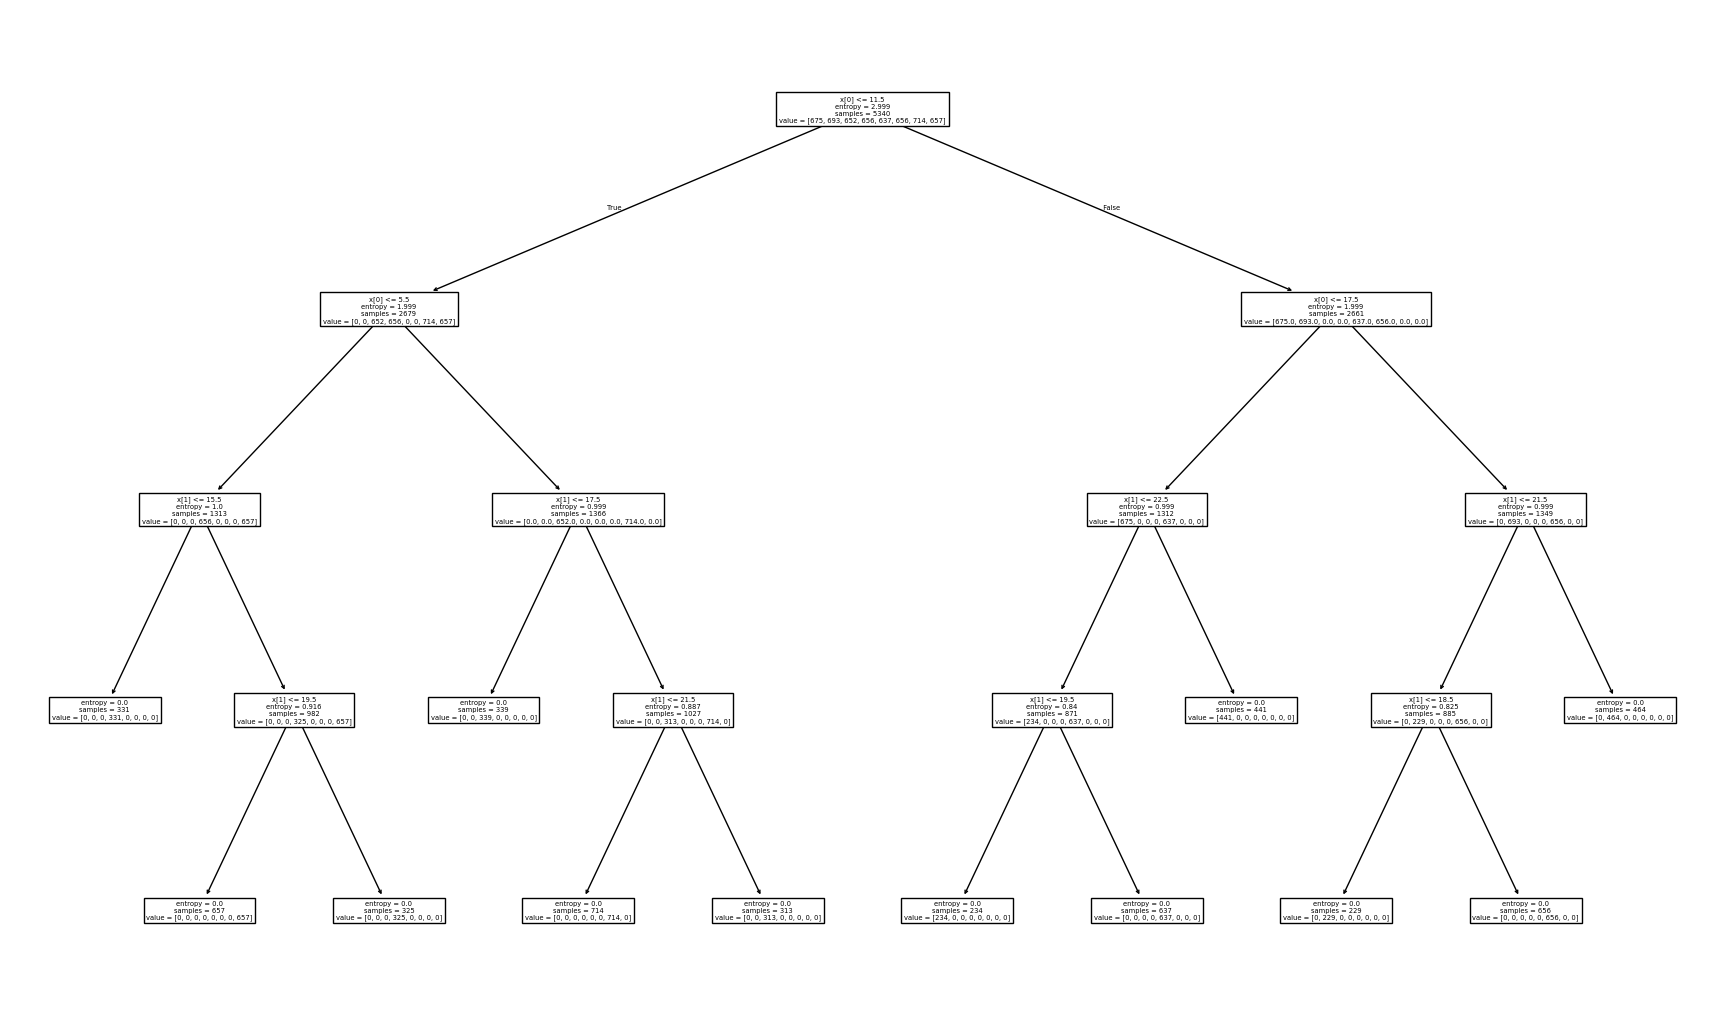

In [150]:
plt.figure(figsize=(22,13))

from sklearn import tree

tree.plot_tree(model_entropy.fit(X_train, y_train))

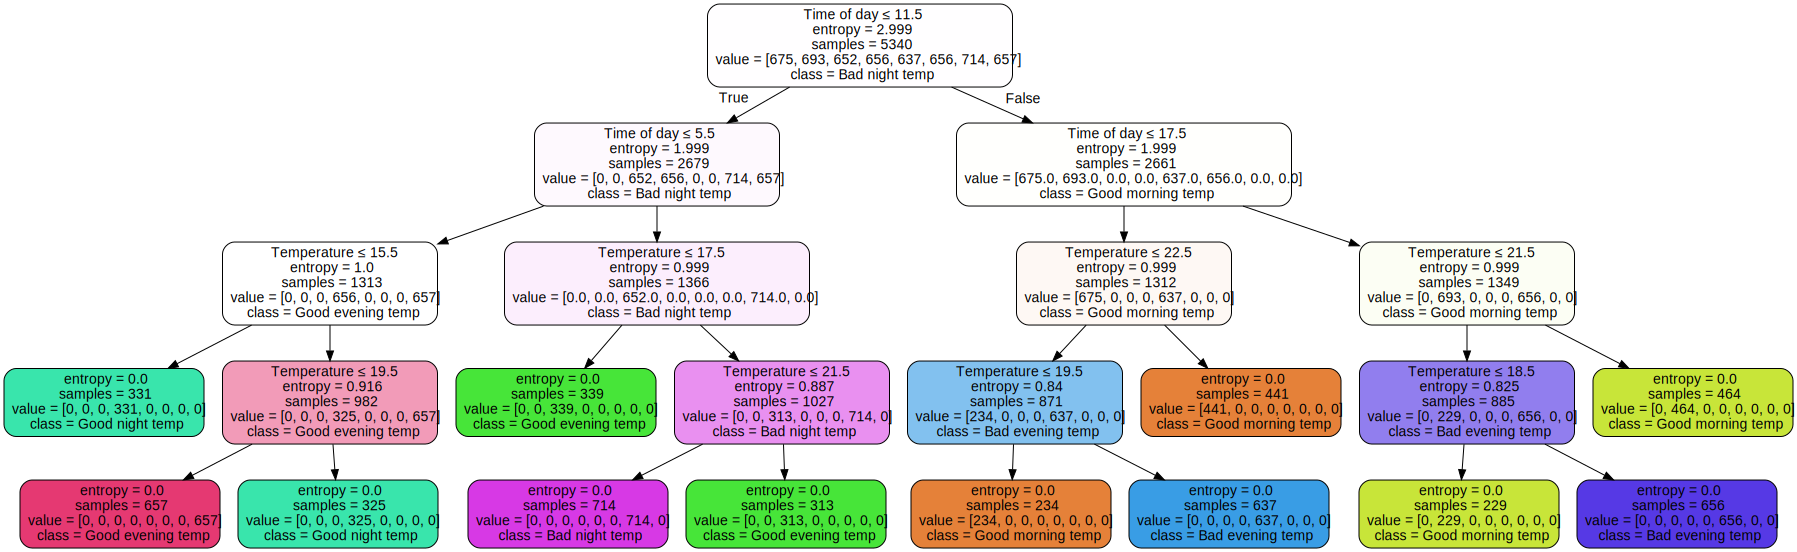

In [151]:
import graphviz
dot_data = tree.export_graphviz(model_entropy, out_file=None,
                              feature_names=X_train.columns,
                              class_names=y_train,
                              filled=True, rounded=True,
                              special_characters=True)

graph = graphviz.Source(dot_data)

graph

In [152]:
'''
Here, due to we get excelent result with decision tree, confusion matrix also get wery good results.
'''

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_en)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[158   0   0   0   0   0   0   0]
 [  0 156   0   0   0   0   0   0]
 [  0   0 159   0   0   0   0   0]
 [  0   0   0 167   0   0   0   0]
 [  0   0   0   0 204   0   0   0]
 [  0   0   0   0   0 158   0   0]
 [  0   0   0   0   0   0 154   0]
 [  0   0   0   0   0   0   0 180]]


In [153]:
'''
Here we can see that results are excellent in every class.
'''
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_en))

                   precision    recall  f1-score   support

     Bad day temp       1.00      1.00      1.00       158
 Bad evening temp       1.00      1.00      1.00       156
 Bad morning temp       1.00      1.00      1.00       159
   Bad night temp       1.00      1.00      1.00       167
    Good day temp       1.00      1.00      1.00       204
Good evening temp       1.00      1.00      1.00       158
Good morning temp       1.00      1.00      1.00       154
  Good night temp       1.00      1.00      1.00       180

         accuracy                           1.00      1336
        macro avg       1.00      1.00      1.00      1336
     weighted avg       1.00      1.00      1.00      1336

